In [8]:
import importlib
import logging
import time

import matplotlib.pyplot as plt
import numba
import numpy as np

import deduce_asymptotics
from deduce_asymptotics import deduce_asymptotics as deduce

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

In [34]:
# @numba.njit
def insertion_sort(input_data: list) -> None:
    for i in range(1, len(input_data)):
        j = i
        while j > 0 and input_data[j - 1] > input_data[j]:
            input_data[j - 1], input_data[j] = input_data[j], input_data[j - 1]
            j -= 1

# @numba.njit
def selection_sort(input_data: list) -> None:
    for i in range(len(input_data) - 1):
        min_index = i
        for j in range(i + 1, len(input_data)):
            if input_data[j] < input_data[min_index]:
                min_index = j
        input_data[i], input_data[min_index] = input_data[min_index], input_data[i]

# @numba.njit
def log_search(input_data: list, key: int=0) -> int:
    i = len(input_data) // 2
    j = 0
    while i >= j:
        if input_data[i] == key:
            return i
        elif input_data[i] > key:
            j = i + 1
        else:
            i = i - 1
    return -1

2024-07-19 10:10:38,142 - Collecting data for insertion_sort...


2024-07-19 10:10:38,146 - Iteration   0. Input length: 32, Avg time: 0.0002228 ± 2.118e-05 seconds
2024-07-19 10:10:38,158 - Iteration   1. Input length: 64, Avg time: 0.001553 ± 0.0007607 seconds
2024-07-19 10:10:38,186 - Iteration   2. Input length: 128, Avg time: 0.005313 ± 0.003365 seconds
2024-07-19 10:10:38,278 - Iteration   3. Input length: 256, Avg time: 0.01773 ± 0.002959 seconds
2024-07-19 10:10:38,479 - Iteration   4. Input length: 512, Avg time: 0.03979 ± 0.004134 seconds
2024-07-19 10:10:39,268 - Iteration   5. Input length: 1024, Avg time: 0.1575 ± 0.005733 seconds
2024-07-19 10:10:42,419 - Iteration   6. Input length: 2048, Avg time: 0.6299 ± 0.00492 seconds
2024-07-19 10:10:55,055 - Iteration   7. Input length: 4096, Avg time: 2.527 ± 0.08441 seconds
2024-07-19 10:11:44,760 - Iteration   8. Input length: 8192, Avg time: 9.941 ± 0.1301 seconds
2024-07-19 10:11:44,760 - Starting the fit...
2024-07-19 10:11:44,761 - Potential candidates: dict_keys(['O(1)', 'O(log n)', 'O(n

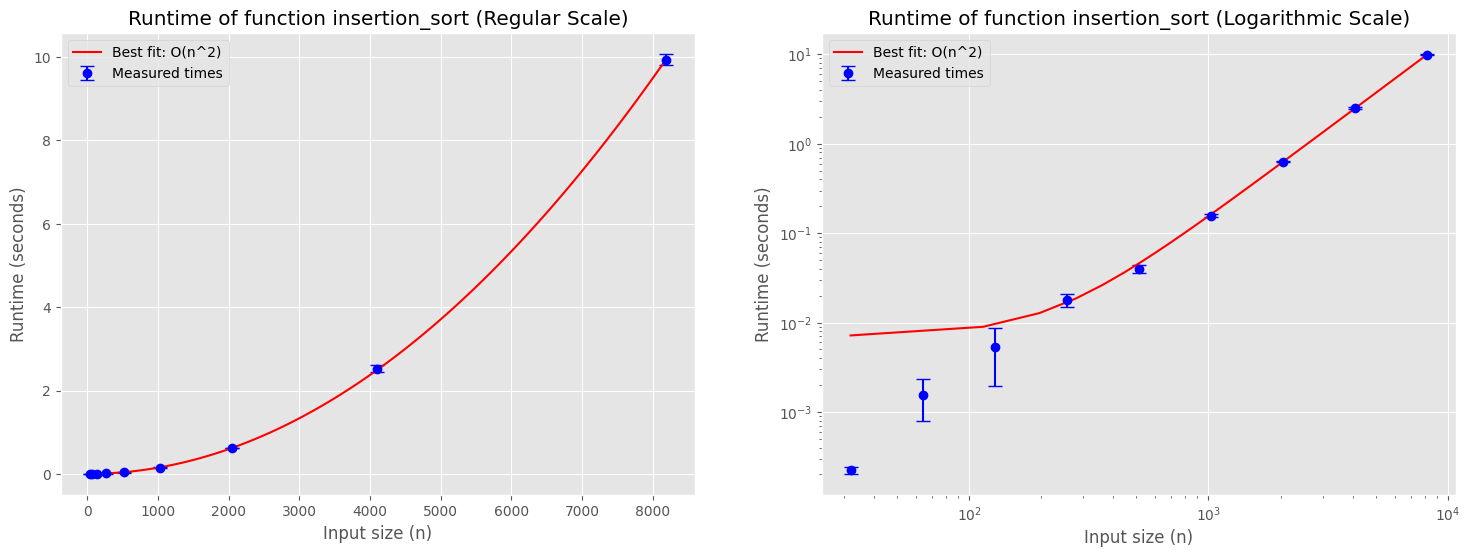

Time complexity of the function insertion_sort is O(n^2)


In [35]:
importlib.reload(deduce_asymptotics)

# @numba.njit
def build_input(n: int) -> list:
    x = np.random.randint(0, 1000, size=n)
    return x

# @numba.njit
def build_input_sorted(n: int) -> list:
    x = np.random.randint(0, 1000, size=n)
    x = np.sort(x)
    return x

# @numba.njit
def f(x: list) -> None:
    # np.sum(input_data)
    np.sort(x)
    # for i in range(len(x)):
    #     j = 1
    #     while j < len(x):
    #         j *= 2
    #         for k in range(len(x)):
    #             x[k] += 1

f(build_input(10))  # Warms up Numba's compilation
f(build_input_sorted(10))  # Warms up Numba's compilation

deduce(build_input, insertion_sort, time_budget=60, num_samples=5)
# deduce(build_input_sorted, log_search, time_budget=60, num_samples=5)